# Machine learning

In [1]:
import pandas as pd
import numpy as np
import pickle
from time import time
import matplotlib.pyplot as plt

%matplotlib inline

## Import the data 

In [2]:
df_pc = pd.read_pickle('pc_processed.pkl')
df_total = pd.read_pickle('total_processed.pkl')

In [3]:
df_pc.head()

,champID,maxNumDeaths,mostChampionKillsPerSession,league,champ1R,champ2R,GoldEarned,MinionKills,PhysicalDamageDealt,MagicDamageDealt,DamageTaken,DoubleKills,TripleKills,QuadraKills,PentaKills,TurretsKilled,KDA,WinRate
summID,,,,,,,,,,,,,,,,,,
19903291,50,12,15,2,2,2,11328.849057,152.132075,26462.264151,82538.754717,31061.660377,0.396226,0.056604,0.000000,0.0,1.283019,2.633117,0.660377
44072154,112,13,19,1,2,2,13843.654867,227.539823,14351.690265,181915.831858,17403.389381,0.849558,0.097345,0.017699,0.0,0.964602,3.191453,0.592920
54318242,80,18,25,2,1,1,12962.095890,136.863014,115143.821918,12217.684932,22639.958904,1.301370,0.109589,0.027397,0.0,1.287671,2.706237,0.602740
25251018,64,16,20,4,1,1,12247.226667,43.493333,84260.320000,31008.986667,35540.360000,0.440000,0.013333,0.000000,0.0,0.333333,2.401396,0.466667
54027173,238,14,21,2,0,0,12994.957143,187.028571,142879.500000,6623.042857,23623.885714,0.764286,0.107143,0.000000,0.0,0.721429,2.789668,0.564286


In [4]:
df_total.head()

,league,GoldEarned,MinionKills,PhysicalDamageDealt,MagicDamageDealt,DamageTaken,DoubleKills,TripleKills,QuadraKills,PentaKills,TurretsKilled,Heal,NeutralMinionsKilled,totalKDA,WinRate
summID,,,,,,,,,,,,,,,
19903291,2,11912.994709,159.177249,57858.574074,72956.251323,26479.129630,0.478836,0.050265,0.005291,0.000000,1.029101,7106.931217,11.558201,2.088841,0.660377
44072154,1,12063.056100,147.158504,62775.583259,74163.608192,23934.457703,0.588602,0.086376,0.012467,0.003562,0.938557,4373.953695,20.987533,2.754342,0.592920
54318242,2,11952.308411,140.448598,82598.042056,39014.864486,25288.752336,0.766355,0.065421,0.014019,0.000000,1.168224,5502.112150,9.401869,2.541176,0.602740
56127024,4,12122.740458,154.984733,96716.005089,37286.058524,23961.541985,0.888041,0.188295,0.035623,0.007634,1.033079,2574.134860,17.872774,2.462137,NaN
21996204,2,12397.862772,166.186141,82090.167120,51349.813859,23164.403533,0.672554,0.086957,0.010870,0.001359,0.980978,3071.572011,9.626359,2.308389,NaN


In [5]:
y_pc = df_pc['league'].values
X_pc = df = df_pc.drop('league', 1)

In [6]:
y_total = df_pc['league'].values
X_total = df = df_pc.drop('league', 1)

## Data split and feature engineering

In [ ]:
X_pc = X_pc[['GoldEarned', 'MinionKills', 'KDA', 'DoubleKills', 'TripleKills', 'QuadraKills', 'PentaKills']]
X_total = X_total[['GoldEarned', 'MinionKills', 'KDA', 'DoubleKills', 'TripleKills', 'QuadraKills', 'PentaKills']]

In [ ]:
from sklearn import preprocessing

In [ ]:
X_pc_scaled = preprocessing.scale(X_pc)
X_total_scaled = preprocessing.scale(X_total)

In [ ]:
X_pc_n = preprocessing.normalize(X_pc_scaled, norm='l2')
X_total_n = preprocessing.normalize(X_total_scaled, norm='l2')

In [7]:
from sklearn.cross_validation import train_test_split

/Users/dmartr/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X_total_n, y_total, test_size=0.25, random_state=0)

# Unsupervised Clustering

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## K-means

Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [ ]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [ ]:
labels = y_total
n_samples, n_features = X_total.shape
sample_size = n_samples
bench_k_means(KMeans(init='k-means++', n_clusters=5, n_init=10), name="k-means++", data=X_pc)

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10)
k_means.fit(X_pc_tr)

## GMM

Source: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html

In [ ]:
from sklearn import mixture
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [ ]:
X = X_total[['GoldEarned', 'MinionKills', 'KDA']]

In [ ]:
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold','darkorange'])
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

# Supervised classification (predicting the elo)

## SVC

In [17]:
from sklearn.svm import LinearSVC

In [18]:
clf = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, 
                multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, 
                verbose=0, random_state=None, max_iter=1000)
clf.fit(X_tr, y_tr) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [19]:
score = metrics.accuracy_score(y_te, clf.predict(X_te))

NameError: name 'metrics' is not defined

In [11]:
print(score)

NameError: name 'score' is not defined

## Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
X_tr, X_te, y_tr, y_te = train_test_split(X_total, y_total, test_size=0.25, random_state=0)

In [14]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_tr, y_tr)
print(rf.score(X_te, y_te))

0.419421487603


Feature ranking (1. most important):
1. Feature name: 'GoldEarned'. Feature index: 5. Importance score: 0.085747
2. Feature name: 'MinionKills'. Feature index: 6. Importance score: 0.084216
3. Feature name: 'WinRate'. Feature index: 16. Importance score: 0.081081
4. Feature name: 'KDA'. Feature index: 15. Importance score: 0.078542
5. Feature name: 'TurretsKilled'. Feature index: 14. Importance score: 0.078221
6. Feature name: 'MagicDamageDealt'. Feature index: 8. Importance score: 0.077284
7. Feature name: 'DamageTaken'. Feature index: 9. Importance score: 0.076357
8. Feature name: 'DoubleKills'. Feature index: 10. Importance score: 0.075699
9. Feature name: 'PhysicalDamageDealt'. Feature index: 7. Importance score: 0.074355
10. Feature name: 'TripleKills'. Feature index: 11. Importance score: 0.061026
11. Feature name: 'mostChampionKillsPerSession'. Feature index: 2. Importance score: 0.052772
12. Feature name: 'maxNumDeaths'. Feature index: 1. Importance score: 0.045903
13. Feature 

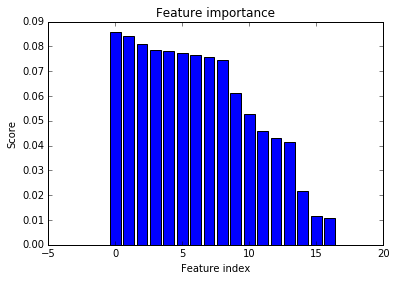

In [15]:
def plot_importance(forest, features_list):
    features = X_tr[features_list].columns
    importances = forest.feature_importances_
    order = np.argsort(importances)[::-1]
    print("Feature ranking (1. most important):")
    for i in range(X_tr.shape[1]-1):
        print("%d. Feature name: '%s'. Feature index: %d. Importance score: %f" % (i + 1, features[order[i]], order[i], importances[order[i]]))
    plt.figure()
    plt.title("Feature importance")
    plt.xlabel("Feature index")
    plt.ylabel("Score")
    plt.bar(range(len(features_list)), importances[order], color="b", align="center")
    plt.show()

plot_importance(rf, X_tr.columns.tolist())

In [16]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_tr[['GoldEarned', 'MinionKills', 'WinRate', 'KDA', 'TurretsKilled', 'MagicDamageDealt', 'DamageTaken','DoubleKills', 
'PhysicalDamageDealt']], y_tr)
print(rf.score(X_te[['GoldEarned', 'MinionKills', 'WinRate', 'KDA', 'TurretsKilled', 'MagicDamageDealt', 'DamageTaken','DoubleKills', 
'PhysicalDamageDealt']], y_te))

0.400236127509
